# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

이 노트북에서는이 프로젝트를 성공적으로 완료하는 데 필요한 단계별 기능을 구현할 수있는 템플릿이 제공됩니다. 노트북에 포함될 수없는 추가 코드가 필요한 경우, 파이썬 코드가 성공적으로 가져오고 필요한 경우 제출에 포함되어야합니다.

> **Note**: 일단 모든 코드 구현을 완료하면, iPython Notebook을 HTML 문서로 내보내기하여 작업을 마무리해야합니다. 전자 필기장을 html로 내보내기 전에 모든 코드 셀을 실행하여 검토자가 최종 구현 및 출력을 볼 수 있도록해야합니다. 위의 메뉴를 사용하여 다음 위치로 이동하여 노트북을 내보낼 수 있습니다. \n",
    "**File -> Download as -> HTML (.html)**. 이 노트북과 함께 완결 된 문서를 제출하십시오.

코드를 구현하는 것 외에도 작성을위한 writeup이 있습니다. 기록은 별도의 파일로 작성해야하며, 파일은 markdown 파일이거나 pdf 문서 일 수 있습니다. 쓰기 과정을 안내하는 데 사용할 수있는 [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md)이 있습니다. 코드 템플릿 및 작성 템플릿을 완료하면이 프로젝트의 모든 [rubric points](https://review.udacity.com/#!/rubrics/481/view)가 포함됩니다.

[rubric](https://review.udacity.com/#!/rubrics/481/view)에는 최소 요구 사항을 넘어서 프로젝트를 향상시키는 "스탠드 아웃 제안"이 포함됩니다. 눈에 띄는 제안은 선택 사항입니다. "눈에 띄는 제안"을 추구하기로 결정한 경우,이 Ipython 노트북에 코드를 포함시키고 결과를 쓰기 파일에서 토론 할 수 있습니다.

>**Note:** 코드 및 마크 다운 셀은 **Shift + Enter** 키보드 단축키를 사용하여 실행할 수 있습니다. 또한 Markdown 셀은 대개 셀을 두 번 클릭하여 편집 모드로 전환하여 편집 할 수 있습니다.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

pickle된 데이터는 4개의 키/값 쌍이있는 사전입니다.

- `'features'` 는 교통 표지 이미지의 원시 픽셀 데이터 (num 예제, 너비, 높이, 채널)를 포함하는 4D 배열입니다.
- `'labels'` 은 교통 표지의 레이블 / 클래스 ID를 포함하는 1D 배열입니다. signnames.csv 파일은 각 id에 대해 `id -> name` 매핑을 포함합니다.
- `'sizes'`는 이미지의 원래 너비와 높이를 나타내는 튜플 (width, height)을 포함하는 목록입니다.
- `'coords'`는 이미지의 기호 주위에 경계 상자의 좌표를 나타내는 튜플 (x1, y1, x2, y2)을 포함하는 목록입니다. 이 좌표는 원래 이미지를 나타냅니다.  **pickle된 데이터에는 이러한 이미지의 제한된 버전 (32 x 32)이 포함되어 있습니다.**

아래의 기본 데이터 요약을 완료하십시오. 파이썬, numpy 및/또는 pandas 메서드를 사용하여 결과를 하드 코딩하는 대신 데이터 요약을 계산하십시오. 예를 들어 [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html)은 일부 요약 결과를 계산하는 데 유용 할 수 있습니다.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
len(set(y_train))

43

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

pickle된 파일을 사용하여 독일어 교통 표지 데이터 세트를 시각화하십시오. 이것은 끝이 없으며, 교통 표지 이미지 플로팅, 각 표지의 수를 플로팅하는 등의 제안이 포함됩니다.
[Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) 및 [gallery](http://matplotlib.org/gallery.html) 페이지는 Python에서 시각화를 수행하는 데 유용한 리소스입니다.

**NOTE:** 먼저 간단한 것으로 시작하는 것이 좋습니다. 더 많은 일을하고 싶다면 나머지 섹션을 완료 한 후에 다시 돌아 오십시오. 교육, 검증 및 테스트 세트에서 수업의 분포를 살펴 보는 것은 흥미로울 수 있습니다. 배포본이 동일합니까? 다른 클래스보다 몇 가지 클래스의 예가 더 있습니까?

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

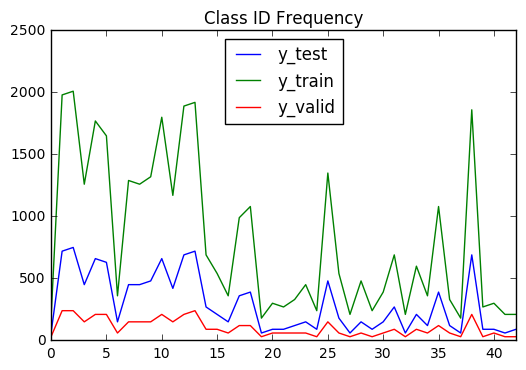

In [5]:
import pandas as pd

def plotClassIdFreq(y, name='y'):
    y = pd.Series(y)
    y = y.value_counts().sort_index()
    return y

y_freq = {}  
    
y_freq['y_train'] = plotClassIdFreq(y_train)
y_freq['y_valid'] = plotClassIdFreq(y_valid)
y_freq['y_test'] = plotClassIdFreq(y_test)



y_freq = pd.DataFrame(y_freq)
y_freq.plot()
plt.title("Class ID Frequency")

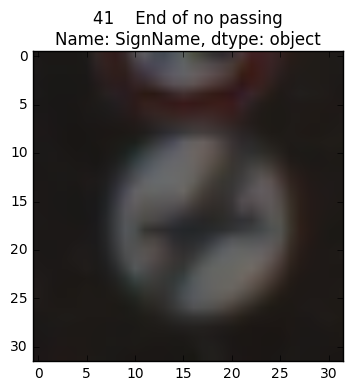

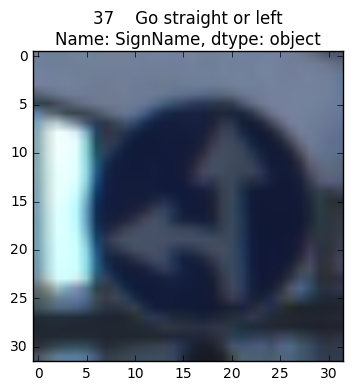

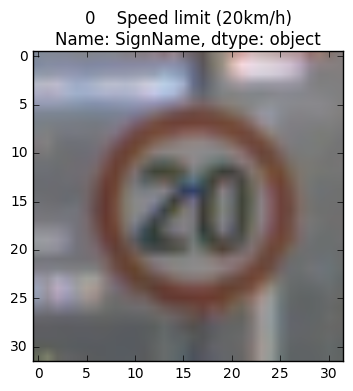

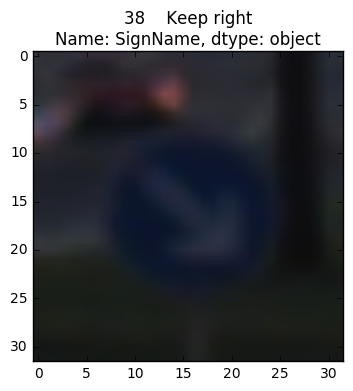

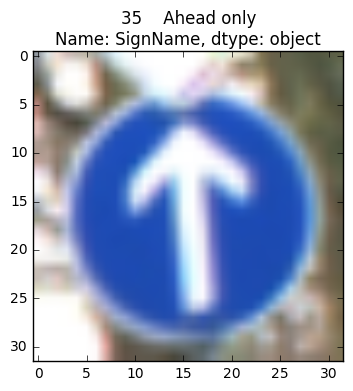

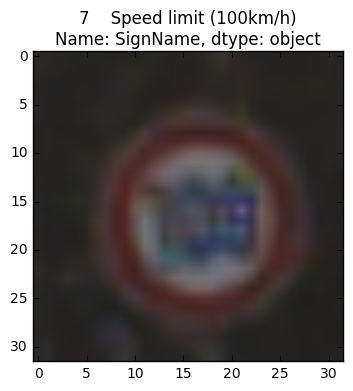

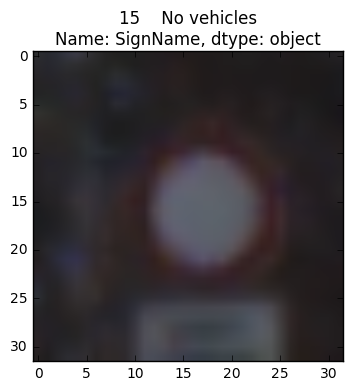

In [6]:
import numpy as np
import pandas as pd

data = pd.read_csv('signnames.csv')

for index in list(range(0,34799,5000)):
    plt.imshow(X_train[index], cmap='gray')
    plt.title(data[data['ClassId']==y_train[index]]['SignName'])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

교통 표지판을 인식하는 법을 배우는 심층 학습 모델을 설계하고 구현하십시오. [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) 모델을 훈련하고 테스트하십시오.

CNN 강의 마지막 [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81)에 표시된 LeNet-5 구현은 탄탄한 출발점입니다. 클래스 수와 전처리를 변경해야하지만, 플러그 앤 플레이를 제외하고는!

강의의 LeNet-5 솔루션을 사용하면 약 0.89의 유효성 검사 정확도를 기대할 수 있습니다. 사양을 충족하려면 유효성 검사 설정 정확도가 0.93 이상이어야합니다. 더 높은 정확도를 얻을 수는 있지만 프로젝트 제출에 필요한 최소값은 0.93입니다.

이 문제를 생각할 때 고려해야 할 여러 측면이 있습니다.

- 신경 네트워크 아키텍처 (네트워크는 과다 또는 과소 적합합니까?)
- 전처리 기술 (정규화, RGB에서 그레이 스케일 등)
- 레이블 당 예제의 수 (일부는 다른 것보다 많음).
- 가짜 데이터를 생성합니다.

다음은 [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)의 예입니다. 논문에서 사용 된 접근법에 익숙하지 않아도 되지만 이와 같은 논문을 읽는 것이 좋습니다.

### Pre-process the Data Set (normalization, grayscale, etc.)

최소한 이미지 데이터는 평균이 0이고 동등한 분산을 갖도록 정규화되어야 합니다. 이미지 데이터의 경우 `(pixel - 128) / 128`은 데이터를 대략 표준화하는 빠른 방법이며 이 프로젝트에서 사용할 수 있습니다.

다른 사전 처리 단계는 선택 사항입니다. 다른 기술을 사용해 성능이 향상되는지 확인할 수 있습니다.

코드 셀 (또는 필요한 경우 여러 코드 셀)을 사용하여 프로젝트의 첫 번째 단계를 구현하십시오.

[[[44 45 47]
  [40 41 47]
  [43 45 53]
  ..., 
  [32 30 32]
  [34 32 35]
  [37 34 37]]

 [[42 41 45]
  [39 39 46]
  [42 43 49]
  ..., 
  [31 28 28]
  [31 29 30]
  [31 29 32]]

 [[40 38 41]
  [38 37 43]
  [40 39 44]
  ..., 
  [29 26 26]
  [28 26 27]
  [27 27 30]]

 ..., 
 [[41 35 38]
  [37 33 38]
  [35 34 38]
  ..., 
  [37 31 33]
  [35 31 32]
  [33 29 30]]

 [[42 35 37]
  [35 31 35]
  [37 36 40]
  ..., 
  [37 30 30]
  [35 30 32]
  [33 29 30]]

 [[37 33 33]
  [32 30 31]
  [39 38 41]
  ..., 
  [36 29 29]
  [33 27 29]
  [31 25 27]]]
(32, 32)
[[-0.6484375 -0.6796875 -0.6484375 ..., -0.7578125 -0.7421875 -0.7265625]
 [-0.671875  -0.6875    -0.6640625 ..., -0.7734375 -0.765625  -0.765625 ]
 [-0.6953125 -0.703125  -0.6875    ..., -0.7890625 -0.7890625 -0.7890625]
 ..., 
 [-0.7109375 -0.7265625 -0.7265625 ..., -0.7421875 -0.75      -0.765625 ]
 [-0.7109375 -0.7421875 -0.7109375 ..., -0.75      -0.75      -0.765625 ]
 [-0.734375  -0.7578125 -0.6953125 ..., -0.7578125 -0.7734375 -0.7890625]]


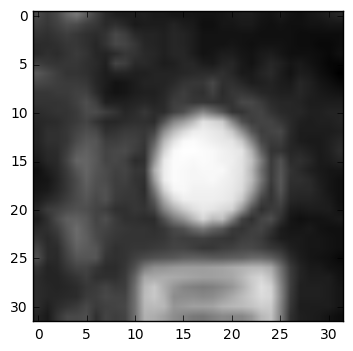

In [7]:
## grayscale
import cv2  #bringing in OpenCV libraries

print(X_train[index])
def preprocess_data(X):
    X = [cv2.cvtColor(x, cv2.COLOR_RGB2GRAY) for x in X]
    X = np.array(X)
    X = np.divide(np.subtract(X,128.),128)
    #X = 0.114 * X[...,0] + 0.587 * X[...,1] + 0.299 * X[...,2] # BGR->Gray
    return X

X_train = preprocess_data(X_train)
X_valid = preprocess_data(X_valid)
X_test = preprocess_data(X_test)

print(X_train[0].shape)

plt.imshow(X_train[index], cmap='gray')
print(X_train[index])


### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

conv1 = None

def LeNet(x, keep_prob):    
    global conv1
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # 32x32 --> 32x32x1 grayscale images
    x = tf.expand_dims(x, -1) 
    
    
    # Weights
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma, name = 'conv1_W'))
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma, name = 'conv2_W'))
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 512), mean = mu, stddev = sigma, name = 'fc1_W'))
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 256), mean = mu, stddev = sigma, name = 'fc2_W'))
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma, name = 'fc3_W'))


    # Layer 1
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') #1x1 stride, VALID padding, outputs 28x28x12
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') # 2x2 stride, outputs 14x14x12
    print('conv1:',conv1.shape)

    # Layer 2
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') # 1x1 stride, VALID padding, outputs 14x14x32
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID') # 2x2 stride, outputs 5x5x32
    print('conv2:',conv2.shape)
    
    fc0   = tf.contrib.layers.flatten(conv2) # flatten output 800
    
    #Layer 3
    fc1   = tf.matmul(fc0, fc1_W) # outputs 512
    fc1   = tf.nn.relu(fc1)
    fc1   = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4
    fc2    = tf.matmul(fc1, fc2_W) # outputs 256
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 5
    logits = tf.matmul(fc2, fc3_W) # outputs 43

    return logits

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
image_shape = X_train[0].shape # (32,32)
x = tf.placeholder("float",[None,image_shape[0],image_shape[1]],name="x")

n_classes = 43
#y = tf.placeholder("float",[None,n_classes],name="y")
y = tf.placeholder(tf.int32, (None))
y_onehot = tf.one_hot(y,depth = 43, on_value = 1.0, off_value = 0.0, axis = -1)

keep_prob = tf.placeholder("float",name="keep_prob")
learning_rate = tf.placeholder("float",name="learning_rate")



# Model
logits = LeNet(x, keep_prob)
# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_onehot))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y_onehot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


def print_stats(session, feature_batch, label_batch, cost, accuracy, epoch=0):
    loss = sess.run(cost, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.})
    acc = sess.run(accuracy, feed_dict={x:feature_batch, y:label_batch, keep_prob:1.})
    print("epoch: {}, loss : {}, validation accuracy: {}".format(epoch,loss,acc))

conv1: (?, 14, 14, 12)
conv2: (?, 5, 5, 32)


In [9]:
import itertools

def split_seq(iterable, size):
    it = iter(iterable)
    item = list(itertools.islice(it, size))
    while item:
        yield item
        item = list(itertools.islice(it, size))

In [10]:
from sklearn.utils import shuffle

#train      
epochs = 20
batch_size = 128
lr = 0.001

index = 1

length = len(X_train)
    
sess = tf.Session()
# Initializing the variables
sess.run(tf.global_variables_initializer())
# Training cycle
for epoch in range(epochs):
    X_train, y_train = shuffle(X_train, y_train)
    for _x, _y in zip(list(split_seq(X_train, batch_size)), list(split_seq(y_train, batch_size))):
        sess.run(optimizer, feed_dict={x:_x, y:_y, keep_prob:0.5, learning_rate:lr})
    print_stats(sess, X_valid, y_valid, cost, accuracy, epoch)

epoch: 0, loss : 0.5648996829986572, validation accuracy: 0.8358278274536133
epoch: 1, loss : 0.2903668284416199, validation accuracy: 0.9117916822433472
epoch: 2, loss : 0.21749712526798248, validation accuracy: 0.9426307082176208
epoch: 3, loss : 0.16886720061302185, validation accuracy: 0.9546487927436829
epoch: 4, loss : 0.19437049329280853, validation accuracy: 0.9514742493629456
epoch: 5, loss : 0.13117074966430664, validation accuracy: 0.9619050621986389
epoch: 6, loss : 0.12259785830974579, validation accuracy: 0.9671204686164856
epoch: 7, loss : 0.1378626674413681, validation accuracy: 0.9594107270240784
epoch: 8, loss : 0.13116182386875153, validation accuracy: 0.9637190699577332
epoch: 9, loss : 0.13902956247329712, validation accuracy: 0.9589571952819824
epoch: 10, loss : 0.13022606074810028, validation accuracy: 0.9655331373214722
epoch: 11, loss : 0.13976556062698364, validation accuracy: 0.9623585343360901
epoch: 12, loss : 0.12576094269752502, validation accuracy: 0.966

### Train, Validate and Test the Model

검증 세트는 모델이 얼마나 잘 수행되고 있는지 평가하는 데 사용할 수 있습니다. 훈련 및 검증에 대한 낮은 정확성
세트는 언더 피팅을 암시합니다. 훈련 세트에 대한 높은 정확도, 유효성 검증 세트에 대한 낮은 정확도는 오버피팅을 의미합니다.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#This is test set
print_stats(sess, X_train, y_train, cost, accuracy, epoch = 'Valid data')
print_stats(sess, X_valid, y_valid, cost, accuracy, epoch = 'Valid data')
print_stats(sess, X_test, y_test, cost, accuracy, epoch = 'Test data')

epoch: Valid data, loss : 0.0012310291640460491, validation accuracy: 0.9998269081115723
epoch: Valid data, loss : 0.1328304260969162, validation accuracy: 0.9696147441864014
epoch: Test data, loss : 0.2833176255226135, validation accuracy: 0.955028235912323


---

## Step 3: Test a Model on New Images

모델 작동 방식에 대한 더 많은 통찰력을 얻으려면 웹에서 독일 교통 표지판을 5 장 이상 다운로드하고 모델을 사용하여 교통 표지 유형을 예측하십시오.

`signnames.csv`는 클래스 id (정수)에서 실제 서명 이름으로의 매핑을 포함하고 있으므로 유용 할 수 있습니다.

### Load and Output the Images

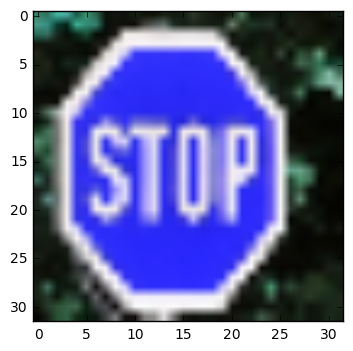

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
def load_gray_img(file_path):
    import cv2
    img = cv2.imread(file_path)
    img  = cv2.resize(img,(32,32))
    return img

import matplotlib.pyplot as plt

img1 = load_gray_img('test_image/test1.png')
img2 = load_gray_img('test_image/test2.png')
img3 = load_gray_img('test_image/test3.png')
img4 = load_gray_img('test_image/test4.png')
img5 = load_gray_img('test_image/test5.png')
plt.imshow(img1)

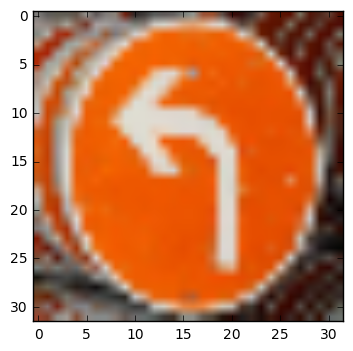

In [13]:
plt.imshow(img2)

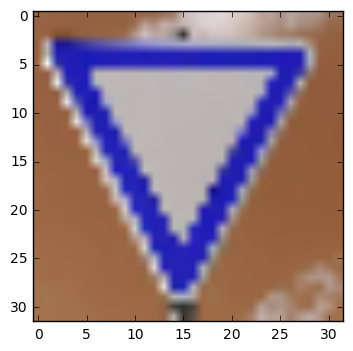

In [14]:
plt.imshow(img3, cmap='gray')

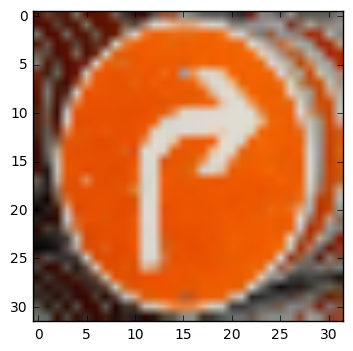

In [15]:
plt.imshow(img4, cmap='gray')

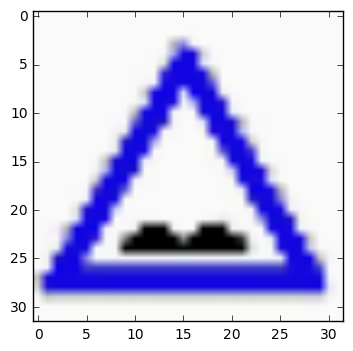

In [16]:
plt.imshow(img5, cmap='gray')

### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

import pandas as pd

data = pd.read_csv('signnames.csv')

data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


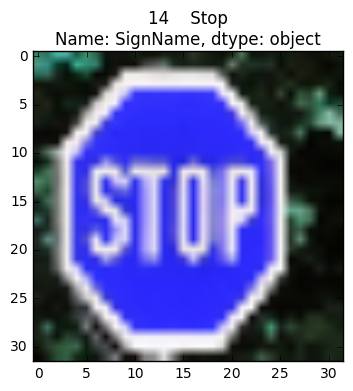

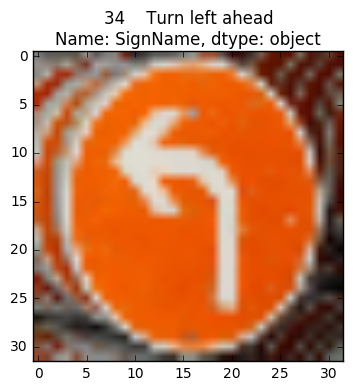

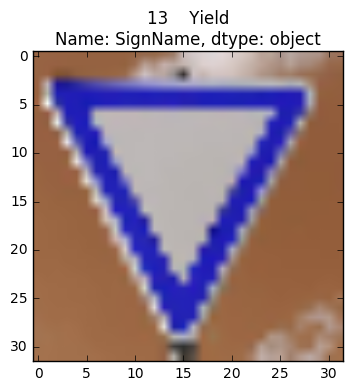

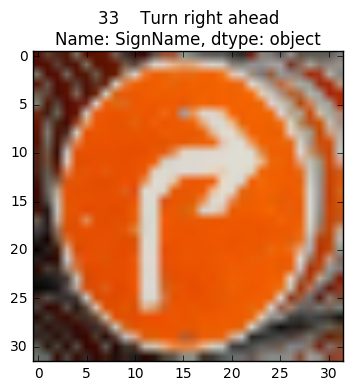

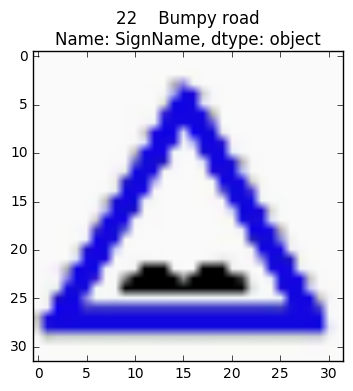

In [18]:
imgs = [img1, img2, img3, img4, img5]
imgs = preprocess_data(imgs)

pred_classid = sess.run(logits, feed_dict={x:imgs, keep_prob:1})

import pandas as pd
data = pd.read_csv('signnames.csv')

for pred,img in zip(pred_classid, [img1, img2, img3, img4, img5]):
    index = np.argmax(pred)
    plt.imshow(img)
    plt.title((data[data['ClassId']==index]['SignName']))
    plt.show()

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

_y = [14,34,13,33,22]
print_stats(sess, imgs, _y, cost, accuracy)

epoch: 0, loss : 0.0, validation accuracy: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

새 이미지 각각에 대해 모델의 softmax 확률을 인쇄하여 모델 예측의 **확실성(certainty)**을 보여줍니다 (출력을 각 이미지의 상위 5 개 확률로 제한). tf.nn.top_k는 여기에서 도움이 될 수 있습니다.

아래 예제는 [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k)를 사용하여 각 이미지에 대한 상위 k 개의 예측을 찾는 방법을 보여줍니다.

`tf.nn.top_k`는 상위 k 개의 예측 값과 인덱스 (클래스 ID)를 반환합니다. 따라서 k = 3 인 경우 각 부호에 대해 3 개의 가장 큰 확률 (가능한 43 개 중)과 해당 클래스 ID를 반환합니다.

이 numpy 배열을 예로 들어 보겠습니다. 배열의 값은 예측을 나타냅니다. 이 배열에는 6 개의 가능한 클래스가있는 5 개의 후보 이미지에 대한 softmax 확률이 포함됩니다. `tf.nn.top_k`는 가장 높은 가능성을 가진 세 가지 클래스를 선택하는 데 사용됩니다.

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

`sess.run (tf.nn.top_k (tf.constant (a), k = 3))`을 통해 그것을 실행하면`

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

우리가 `[0.34763842, 0.24879643, 0.12789202]`를 얻는 첫 번째 행을 보았을 때, 이것이 3 가지 확률임을 확인할 수 있습니다. 또한 `[3, 0, 5]`가 해당 색인임을 알 수 있습니다.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

pred_classid = sess.run(logits, feed_dict={x:imgs, keep_prob:1})

for pred, __y in zip(pred_classid, _y):
    print('sum: ',softmax(pred).sum())
    print(softmax(pred))
    print('Probability:',softmax(pred)[__y])
    

sum:  1.0
[  1.07116945e-25   5.05625482e-27   4.27619219e-32   1.70486403e-30
   2.14506065e-16   1.34248773e-24   1.19759171e-40   9.67036070e-42
   3.62068630e-29   5.19111016e-41   1.32843094e-42   1.17709071e-43
   4.20389539e-45   2.55958069e-35   1.00000000e+00   2.80259693e-45
   0.00000000e+00   2.21117860e-30   2.89117820e-31   8.62919594e-42
   6.58147850e-41   4.03994347e-42   9.80908925e-45   2.38220739e-43
   6.96840503e-40   2.20024030e-30   1.55076468e-36   9.38869971e-44
   0.00000000e+00   1.44051751e-36   8.47785571e-43   1.33123354e-43
   7.87809576e-39   3.26235825e-28   9.07903056e-29   2.23801378e-41
   2.13329334e-39   5.84984489e-29   6.51231770e-30   4.38912886e-28
   4.48415509e-44   0.00000000e+00   0.00000000e+00]
Probability: 1.0
sum:  1.0
[  3.98194357e-17   2.15222430e-16   1.59926758e-18   2.29097848e-16
   1.93111307e-22   2.99445301e-19   9.31201688e-27   4.82055210e-28
   1.49569607e-15   1.45619077e-15   8.02145862e-20   1.18315690e-15
   4.13147429

In [21]:
sess.run (tf.nn.top_k (tf.constant (pred_classid), k = 3))

TopKV2(values=array([[  59.92644501,   23.84825134,    4.9589262 ],
       [  30.54633713,    8.26248169,    4.17206764],
       [ 151.22631836,   20.90031815,   18.42261696],
       [  25.86555672,    4.75723696,    4.75218439],
       [ 122.74447632,   44.27174377,   22.59836769]], dtype=float32), indices=array([[14,  4,  5],
       [34, 38, 13],
       [13, 35, 15],
       [33, 39, 35],
       [22, 29, 24]]))

### Project Writeup

코드 구현을 완료하고 이 [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md)을 지침으로 사용하여 프로젝트 작성에 결과를 문서화하십시오. writeup은 markdown 또는 pdf 파일에있을 수 있습니다.

> **Note**: 모든 코드 구현을 완료하고 위의 각 질문에 성공적으로 대답하면 iPython 노트를 HTML 문서로 내보내 작업을 완료 할 수 있습니다. 위의 메뉴를 사용하고 \ n ",
    "**File -> Download as -> HTML (.html)**을 탐색하면됩니다. 이 노트북과 함께 완결 된 문서를 제출하십시오.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

이 섹션은 완료 할 필요가 없지만 신경망의 가중치의 출력을 분석하기 위한 추가 성능 지표 역할을합니다. 신경 네트워크는 훌륭한 학습 장치가 될 수 있지만 블랙 박스라고도합니다. 우리는 신경망의 가중치가 자신의 피쳐 맵을 플로팅함으로써 더 잘 생겼는지 이해할 수 있습니다. 신경 네트워크를 성공적으로 훈련 한 후에는 테스트 자극 이미지에 대한 응답으로 네트워크의 무게 레이어 출력을 플로팅하여 피쳐 맵이 어떻게 보이는지 확인할 수 있습니다. 이러한 플롯 된 기능 맵을 통해 네트워크에서 흥미로운 이미지의 특성을 확인할 수 있습니다. 기호의 경우 내부 네트워크 기능 맵이 기호의 경계 외곽선 또는 기호의 페인트 기호의 대비에 대한 높은 활성화와 반응 할 수 있습니다.

아래에 제공되는 함수 코드를 통해 원하는 텐서 흐름 웨이트 레이어의 시각화 출력을 얻을 수 있습니다. 함수에 대한 입력은 학습 이미지 나 학습 중에 사용 된 자극 이미지, 교육 과정에서 레이어의 상태를 나타내는 텐서 흐름 변수 이름이어야합니다. 예를 들어 LeNet 랩([LeNet lab](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81))의 기능을보고 싶다면 지도는 tv_activation 변수로 conv2를 입력 할 수있는 두 번째 길쌈 레이어와 비슷하게 보입니다.

기능지도 출력의 예를 보려면 내부 CNN 상태의 시각화 섹션에서 [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/)에서 NVIDIA의 결과를 확인하십시오. NVIDIA는 명확한 경로가있는 이미지의 기능 맵을없는 경로로 비교함으로써 네트워크의 내부 가중치가 도로 경계선에 높은 활성화를 보였음을 보여줍니다. 트레이닝 된 네트워크의 가중치가 기호가 있거나없는 이미지의 기능 맵의 차이를 보든, 훈련 된 네트워크에서 보이는 것과 같은 기능 맵이든 완전히 익숙하지 않은지 여부에 관계없이 흥미로운 기능을 찾고 있음을 보여주는 유사한 테스트를 시도하십시오. 하나는 같은 사인 이미지입니다.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


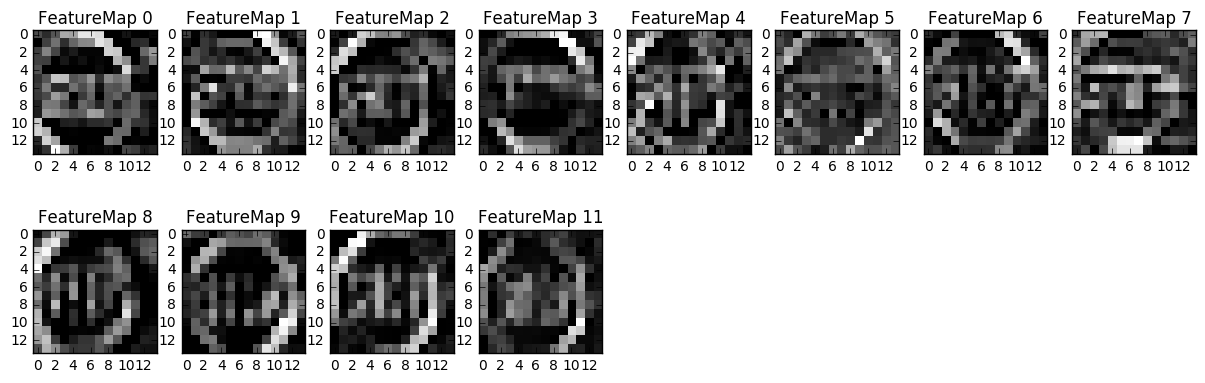

In [22]:
### 네트워크의 기능 맵을 여기에서 시각화하십시오.
### 필요에 따라 많은 코드 셀을 자유롭게 사용할 수 있습니다.

# image_input : 네트워크로 공급되는 테스트 이미지로 기능 맵 생성
# tf_activation : 훈련 과정에서 특정 무게 층의 계산 된 상태를 나타내는 tf 변수 이름이어야합니다.
# activation_min / max : 활성화 대비를 자세히 보는 데 사용할 수 있습니다. 기본적으로 matplot은 min 및 max를 출력의 실제 최소 및 최대 값으로 설정합니다
# plt_num : 동일한 블록에 여러 가중치 기능 맵 세트를 플롯하는 데 사용되며 각 새 기능 맵 항목에 대한 plt 번호를 확장합니다.

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # 네트워크에서 기대하는 방식으로 image_input을 사전 처리해야합니다.
    #크기, 정규화, 필요한 경우 요법과 함께
    #image_input =
    # 참고 : x는 네트워크의 tensorflow 데이터 자리 표시 자 변수와 동일한 이름이어야합니다.
    #tf_activation이 정의되지 않았다는 오류가 발생하면 함수 내부에서 변수에 액세스하는 데 문제가있을 수 있습니다.
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            
outputFeatureMap(imgs, conv1)